<a href="https://colab.research.google.com/github/AliHazem3/Bike_Rental_Project-/blob/main/Bike_Rental_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Questions**


1.Make Profit feature

1.   Registered  user  rent bike for 5 USD/day.
1.   Casual user rent bike for 20 USD.
2.   Taxes 0.14%
2.   Maintance  1500/year

2.Distribution rental_bikes_count & Profit

1.  Max raw in count
2.  Max raw in Profit

3.Profit for each day of week

4.Which season that has more registeration & Profit.

5.Which weather codition that has more count.

6.Correlations between Profit and bikes count with all features.



7.Registered or casual is more

8.what is the average of bikes would be registered during the week.

9.Which seanson Profit is max in 2011



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/bike-sharing-demand.csv")

In [ ]:
# First 5 raws in dataset
df.head()

,datetime,Seasons,workingday,weather,Temperature,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,Winter,0,Clear,9.84,81,0.0,3,13,16
1,1/1/2011 1:00,Winter,0,Clear,9.02,80,0.0,8,32,40
2,1/1/2011 2:00,Winter,0,Clear,9.02,80,0.0,5,27,32
3,1/1/2011 3:00,Winter,0,Clear,9.84,75,0.0,3,10,13
4,1/1/2011 4:00,Winter,0,Clear,9.84,75,0.0,0,1,1


In [ ]:
# Last 5 raws in dataset
df.tail()

,datetime,Seasons,workingday,weather,Temperature,humidity,windspeed,casual,registered,count
10881,12/19/2012 19:00,Summer,1,Rainy,15.58,50,26.0027,7,329,336
10882,12/19/2012 20:00,Summer,1,Rainy,14.76,57,15.0013,10,231,241
10883,12/19/2012 21:00,Summer,1,Rainy,13.94,61,15.0013,4,164,168
10884,12/19/2012 22:00,Summer,1,Rainy,13.94,61,6.0032,12,117,129
10885,12/19/2012 23:00,Summer,1,Rainy,13.12,66,8.9981,4,84,88


In [ ]:
# Describe dataset


,workingday,Temperature,humidity,windspeed,casual,registered,count
count,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.680875,20.23086,61.886460,12.799395,36.021955,155.552177,191.574132
std,0.466159,7.79159,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.000000,0.82000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,13.94000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,1.000000,20.50000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,1.000000,26.24000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,41.00000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# checking the number of missing values
df.isnull().sum()

datetime       0
Seasons        0
workingday     0
weather        0
Temperature    0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     10886 non-null  object 
 1   Seasons      10886 non-null  object 
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  object 
 4   Temperature  10886 non-null  float64
 5   humidity     10886 non-null  int64  
 6   windspeed    10886 non-null  float64
 7   casual       10886 non-null  int64  
 8   registered   10886 non-null  int64  
 9   count        10886 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 850.6+ KB


In [ ]:
#1. Make Profit feature
def calculate_profit(x):
  Casual_Cstomers= x['casual']
  Registered_Cstomers= x['registered']
  Registered_price_per_hour=5
  Casual_price_per_hour=20
  Taxes_percent=0.14
  Maintance_per_hor= 1500/ (365*24)
  Profit_cash= Casual_Cstomers * Casual_price_per_hour + Registered_Cstomers *  Registered_price_per_hour
  Profit_with_taxes= Profit_cash - (Profit_cash * Taxes_percent)
  Clear_Profit= Profit_with_taxes -  Maintance_per_hor
  return Clear_Profit


df['Profit']=df[['casual', 'registered']].apply(calculate_profit, axis=1)
df

,datetime,Seasons,workingday,weather,Temperature,humidity,windspeed,casual,registered,count,Profit
0,1/1/2011 0:00,Winter,0,Clear,9.84,81,0.0000,3,13,16,107.328767
1,1/1/2011 1:00,Winter,0,Clear,9.02,80,0.0000,8,32,40,275.028767
2,1/1/2011 2:00,Winter,0,Clear,9.02,80,0.0000,5,27,32,201.928767
3,1/1/2011 3:00,Winter,0,Clear,9.84,75,0.0000,3,10,13,94.428767
4,1/1/2011 4:00,Winter,0,Clear,9.84,75,0.0000,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,Summer,1,Rainy,15.58,50,26.0027,7,329,336,1534.928767
10882,12/19/2012 20:00,Summer,1,Rainy,14.76,57,15.0013,10,231,241,1165.128767
10883,12/19/2012 21:00,Summer,1,Rainy,13.94,61,15.0013,4,164,168,773.828767
10884,12/19/2012 22:00,Summer,1,Rainy,13.94,61,6.0032,12,117,129,709.328767


In [ ]:
#2.Distribution  count & Profit
df['Profit'].describe()


count    10886.000000
mean      1288.280751
std       1309.683400
min          4.128767
25%        253.528767
50%        889.928767
75%       1891.828767
max       7881.728767
Name: Profit, dtype: float64

In [ ]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [ ]:
# Max raw in profit
df[df['Profit']==df['Profit'].max()]

,datetime,Seasons,workingday,weather,Temperature,humidity,windspeed,casual,registered,count,Profit
9415,9/15/2012 16:00,Winter,0,Mist,27.06,36,15.0013,350,433,783,7881.728767


In [ ]:
# Max raw in count
df[df['count']==df['count'].max()]

,datetime,Seasons,workingday,weather,Temperature,humidity,windspeed,casual,registered,count,Profit
9345,9/12/2012 18:00,Winter,1,Mist,27.06,44,16.9979,91,886,977,5374.828767


In [ ]:
# 3.Profit for each day of week
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M')
df['hour']=df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['month_name']=df['datetime'].dt.month_name()
df['month']=df['datetime'].dt.month
df['year']=df['datetime'].dt.year
df.groupby('day_of_week').describe()[['Profit']].transpose()

day_of_week        Friday       Monday     Saturday       Sunday     Thursday  \
Profit count  1529.000000  1551.000000  1584.000000  1579.000000  1553.000000   
       mean   1250.484751  1203.496079  1666.252504  1513.401535  1157.893803   
       std    1110.019552  1129.727600  1772.625088  1571.404307  1086.029849   
       min       4.128767     4.128767     4.128767     4.128767     4.128767   
       25%     300.828767   249.228767   283.628767   287.928767   236.328767   
       50%    1036.128767   954.428767   956.578767   812.528767   911.428767   
       75%    1891.828767  1827.328767  2614.228767  2429.328767  1741.328767   
       max    5908.028767  5594.128767  7881.728767  7034.628767  5533.928767   

day_of_week       Tuesday    Wednesday  
Profit count  1539.000000  1551.000000  
       mean   1112.073082  1100.526188  
       std    1065.481400  1111.243780  
       min       4.128767     4.128767  
       25%     210.528767   210.528767  
       50%     834.028767   791.028767  
       75%    1704.778767  1657.478767  
       max    6338.028767  5447.928767

In [ ]:
# 4.Which season that has more  Profit.
df.groupby('Seasons').describe()[['Profit', 'registered' ]].transpose()

Seasons                Autumn       Spring       Summer       Winter
Profit     count  2604.000000  3106.000000  2285.000000  2891.000000
           mean   1934.079074  1362.788941   850.054500   972.910884
           std    1633.369465  1167.652742   812.642062  1199.028019
           min       4.128767     4.128767     4.128767     4.128767
           25%     464.228767   382.528767   206.228767   167.528767
           50%    1741.328767  1154.378767   662.028767   520.128767
           75%    2833.528767  1976.753767  1221.028767  1330.678767
           max    7795.728767  7034.628767  5151.228767  7881.728767
registered count  2604.000000  3106.000000  2285.000000  2891.000000
           mean    210.602919   160.476819   131.510722   119.677620
           std     180.123530   139.007421   118.697881   142.491490
           min       1.000000     0.000000     1.000000     0.000000
           25%      58.000000    48.250000    32.000000    24.000000
           50%     180.000000   133.000000   107.000000    72.000000
           75%     299.000000   229.000000   189.000000   158.000000
           max     790.000000   803.000000   665.000000   886.000000

In [ ]:
# 5.Which weather codition that has more count.
df.groupby('weather').describe()['count'].transpose()

weather,Clear,Mist,Rainy,Snowy
count,1515.000000,2484.000000,1420.000000,5467.000000
mean,76.481188,277.720612,243.212676,170.914030
std,73.369589,223.838352,204.720232,148.490535
min,1.000000,1.000000,1.000000,1.000000
25%,18.000000,75.000000,69.000000,44.000000
50%,59.000000,246.500000,210.000000,140.000000
75%,109.500000,420.000000,359.000000,254.000000
max,715.000000,977.000000,948.000000,822.000000


In [ ]:
# 6.Correlations between Profit and count with all features.
correlation = df.corr()
print(correlation[['Profit', 'count']])

               Profit     count
workingday  -0.150138  0.011594
Temperature  0.464454  0.394454
humidity    -0.360095 -0.317371
windspeed    0.105697  0.101369
casual       0.902713  0.690414
registered   0.822156  0.970948
count        0.934490  1.000000
Profit       1.000000  0.934490
hour         0.386889  0.400601
month        0.144868  0.166862
year         0.226345  0.260403


<ipython-input-17-aae331a87c3b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

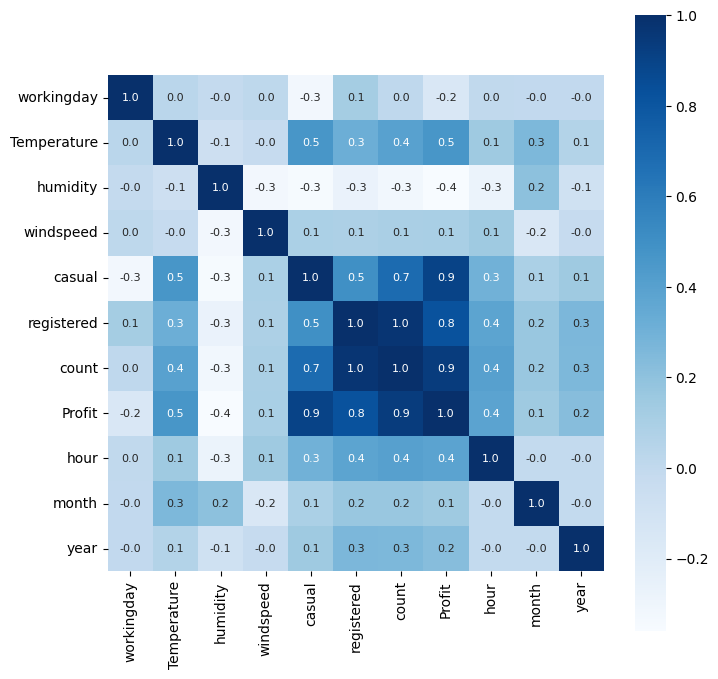

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# Which season that has more  Profit.
df.groupby('Seasons').describe()['Profit'].transpose()

Seasons,Autumn,Spring,Summer,Winter
count,2604.000000,3106.000000,2285.000000,2891.000000
mean,1934.079074,1362.788941,850.054500,972.910884
std,1633.369465,1167.652742,812.642062,1199.028019
min,4.128767,4.128767,4.128767,4.128767
25%,464.228767,382.528767,206.228767,167.528767
50%,1741.328767,1154.378767,662.028767,520.128767
75%,2833.528767,1976.753767,1221.028767,1330.678767
max,7795.728767,7034.628767,5151.228767,7881.728767


In [ ]:
#7.Rental & Profit during Rush hour (7-9 am & 15-17 pm)
def is_Rush_hour (hour):
  if hour in [7,8,9,15,16,17]:
    return 1
  else:
    return 0
df['is_Rush_hour']=df['hour'].apply(is_Rush_hour)

In [ ]:
df.groupby('is_Rush_hour').describe()['Profit'].transpose()

is_Rush_hour,0,1
count,8153.000000,2733.000000
mean,1069.674358,1940.420498
std,1217.987206,1356.260623
min,4.128767,4.128767
25%,158.928767,937.228767
50%,644.828767,1689.728767
75%,1547.828767,2622.828767
max,7864.528767,7881.728767


In [ ]:
df.groupby('is_Rush_hour').describe()['count'].transpose()

is_Rush_hour,0,1
count,8153.000000,2733.000000
mean,153.140562,306.227955
std,158.808647,194.740685
min,1.000000,1.000000
25%,26.000000,157.000000
50%,108.000000,276.000000
75%,225.000000,420.000000
max,977.000000,970.000000


In [ ]:
#8.Registered or casual is more.
df.corr()[['Profit', 'count']].loc[['casual','registered']]


<ipython-input-23-f6b2bce5aab9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['Profit', 'count']].loc[['casual','registered']]


,Profit,count
casual,0.902713,0.690414
registered,0.822156,0.970948


In [ ]:
#9.what is the average of bikes would be registered during the week.
df.groupby('day_of_week').mean()[['Profit','count']]


<ipython-input-24-faba558d2a9f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('day_of_week').mean()[['Profit','count']]


,Profit,count
day_of_week,,
Friday,1250.484751,197.844343
Monday,1203.496079,190.390716
Saturday,1666.252504,196.665404
Sunday,1513.401535,180.839772
Thursday,1157.893803,197.296201
Tuesday,1112.073082,189.723847
Wednesday,1100.526188,188.411348


In [ ]:
df

,datetime,Seasons,workingday,weather,Temperature,humidity,windspeed,casual,registered,count,Profit,hour,day_of_week,month_name,month,year,is_Rush_hour
0,2011-01-01 00:00:00,Winter,0,Clear,9.84,81,0.0000,3,13,16,107.328767,0,Saturday,January,1,2011,0
1,2011-01-01 01:00:00,Winter,0,Clear,9.02,80,0.0000,8,32,40,275.028767,1,Saturday,January,1,2011,0
2,2011-01-01 02:00:00,Winter,0,Clear,9.02,80,0.0000,5,27,32,201.928767,2,Saturday,January,1,2011,0
3,2011-01-01 03:00:00,Winter,0,Clear,9.84,75,0.0000,3,10,13,94.428767,3,Saturday,January,1,2011,0
4,2011-01-01 04:00:00,Winter,0,Clear,9.84,75,0.0000,0,1,1,4.128767,4,Saturday,January,1,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Summer,1,Rainy,15.58,50,26.0027,7,329,336,1534.928767,19,Wednesday,December,12,2012,0
10882,2012-12-19 20:00:00,Summer,1,Rainy,14.76,57,15.0013,10,231,241,1165.128767,20,Wednesday,December,12,2012,0
10883,2012-12-19 21:00:00,Summer,1,Rainy,13.94,61,15.0013,4,164,168,773.828767,21,Wednesday,December,12,2012,0
10884,2012-12-19 22:00:00,Summer,1,Rainy,13.94,61,6.0032,12,117,129,709.328767,22,Wednesday,December,12,2012,0


In [ ]:
# 10. Profit in 2011 & Monday & season summer
df[   (df['year']==2011) & (df['day_of_week']=='Saturday') & (df['Seasons']=='Summer')]

,datetime,Seasons,workingday,weather,Temperature,humidity,windspeed,casual,registered,count,Profit,hour,day_of_week,month_name,month,year,is_Rush_hour
4391,2011-10-15 00:00:00,Summer,0,Snowy,18.86,55,7.0015,18,88,106,687.828767,0,Saturday,October,10,2011,0
4392,2011-10-15 01:00:00,Summer,0,Snowy,18.86,55,16.9979,9,64,73,429.828767,1,Saturday,October,10,2011,0
4393,2011-10-15 02:00:00,Summer,0,Snowy,18.86,59,12.9980,17,39,56,459.928767,2,Saturday,October,10,2011,0
4394,2011-10-15 03:00:00,Summer,0,Snowy,18.04,62,12.9980,5,18,23,163.228767,3,Saturday,October,10,2011,0
4395,2011-10-15 04:00:00,Summer,0,Snowy,17.22,67,8.9981,0,6,6,25.628767,4,Saturday,October,10,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,2011-12-17 19:00:00,Summer,0,Snowy,9.84,65,22.0028,11,95,106,597.528767,19,Saturday,December,12,2011,0
5370,2011-12-17 20:00:00,Summer,0,Snowy,9.02,69,16.9979,7,99,106,545.928767,20,Saturday,December,12,2011,0
5371,2011-12-17 21:00:00,Summer,0,Snowy,8.20,75,11.0014,8,88,96,515.828767,21,Saturday,December,12,2011,0
5372,2011-12-17 22:00:00,Summer,0,Snowy,8.20,75,11.0014,7,73,80,434.128767,22,Saturday,December,12,2011,0


In [ ]:
# see names & type inside  Seasons
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
# 10. Which seanson Profit is max in 2011
df[   (df['year']==2011) & (df['Seasons']=='Summer')]['Profit'].sum()

948782.2205479452

In [ ]:
df[   (df['year']==2011) & (df['Seasons']=='Spring')]['Profit'].sum()

2995517.9178082193

In [ ]:
df[ (df['year']==2011) & (df['Seasons']=='Winter') ]['Profit'].sum()


1427320.4369863013

In [ ]:
df[ (df['year']==2011) & (df['Seasons']=='Autumn') ]['Profit'].sum()

0.0

In [ ]:
max_Profit_seasons = max(df[ (df['year']==2011) & (df['Seasons']=='Winter') ]['Profit'].sum() ,
                         df[   (df['year']==2011) & (df['Seasons']=='Spring')]['Profit'].sum(),
                         df[   (df['year']==2011) & (df['Seasons']=='Summer')]['Profit'].sum(),)
max_Profit_seasons
# Note max season was Spring

2995517.9178082193

In [ ]:
#Use Pivot table to see Profit in days of month
new_df=pd.pivot_table(data=df, values='Profit', columns='day_of_week', index='month')
new_df

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1,562.122384,391.098271,583.123767,507.168627,565.983389,471.271287,422.948767
2,720.246498,575.349820,663.462100,565.585910,561.281584,537.583852,589.928063
3,819.221021,968.421987,1401.718350,1258.993724,873.243556,759.302717,865.646414
4,1154.450434,1347.061161,1564.097100,1901.682934,1298.500434,1145.928073,1017.447255
5,1654.002934,1172.976267,2287.966267,1791.423767,1477.266962,1251.994739,1189.405850
6,1575.002378,1474.728767,2399.467656,2142.542656,1422.161267,1441.439600,1451.257934
7,1685.607934,1704.002378,2129.260434,1874.837795,1607.132934,1472.459323,1682.382934
8,1620.510712,1476.018767,2177.205434,1696.931267,1571.299600,1531.130434,1557.712795
9,1501.890434,1599.458837,2141.885712,2215.463489,1217.921204,1294.020364,1420.942934


In [ ]:
df.groupby('month').max()['Profit']


month
1     4213.828767
2     5099.628767
3     7679.628767
4     7344.228767
5     7795.728767
6     6849.728767
7     6187.528767
8     6497.128767
9     7881.728767
10    7864.528767
11    7034.628767
12    4480.428767
Name: Profit, dtype: float64

In [ ]:
df.groupby('day_of_week').max()['Profit']

day_of_week
Friday       5908.028767
Monday       5594.128767
Saturday     7881.728767
Sunday       7034.628767
Thursday     5533.928767
Tuesday      6338.028767
Wednesday    5447.928767
Name: Profit, dtype: float64

In [ ]:
df

,datetime,Seasons,workingday,weather,Temperature,humidity,windspeed,casual,registered,count,Profit,hour,day_of_week,month_name,month,year,is_Rush_hour
0,2011-01-01 00:00:00,Winter,0,Clear,9.84,81,0.0000,3,13,16,107.328767,0,Saturday,January,1,2011,0
1,2011-01-01 01:00:00,Winter,0,Clear,9.02,80,0.0000,8,32,40,275.028767,1,Saturday,January,1,2011,0
2,2011-01-01 02:00:00,Winter,0,Clear,9.02,80,0.0000,5,27,32,201.928767,2,Saturday,January,1,2011,0
3,2011-01-01 03:00:00,Winter,0,Clear,9.84,75,0.0000,3,10,13,94.428767,3,Saturday,January,1,2011,0
4,2011-01-01 04:00:00,Winter,0,Clear,9.84,75,0.0000,0,1,1,4.128767,4,Saturday,January,1,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Summer,1,Rainy,15.58,50,26.0027,7,329,336,1534.928767,19,Wednesday,December,12,2012,0
10882,2012-12-19 20:00:00,Summer,1,Rainy,14.76,57,15.0013,10,231,241,1165.128767,20,Wednesday,December,12,2012,0
10883,2012-12-19 21:00:00,Summer,1,Rainy,13.94,61,15.0013,4,164,168,773.828767,21,Wednesday,December,12,2012,0
10884,2012-12-19 22:00:00,Summer,1,Rainy,13.94,61,6.0032,12,117,129,709.328767,22,Wednesday,December,12,2012,0


## Data visualization
Numerical featres - univariante

Numerical featres - Bivariante

Categorical - univariante

Categorical - Bivariante

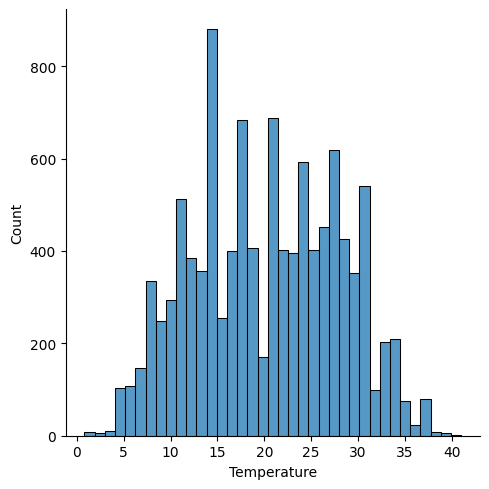

In [ ]:
sns.displot(df['Temperature'])

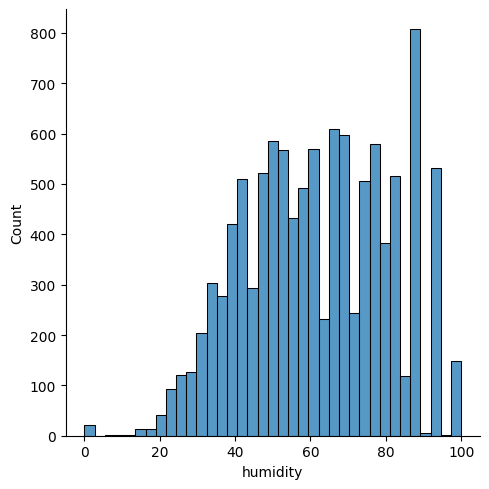

In [ ]:
sns.displot(df['humidity'])

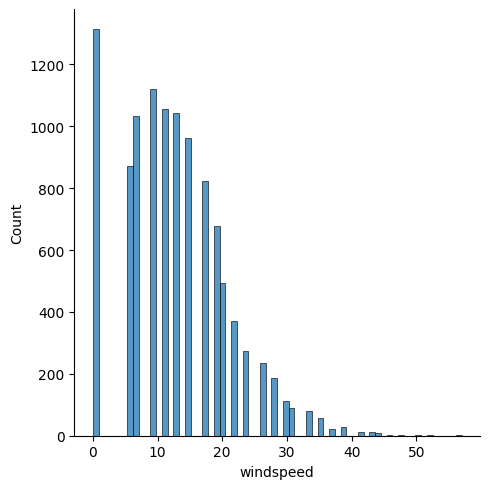

In [ ]:
sns.displot(df['windspeed'])

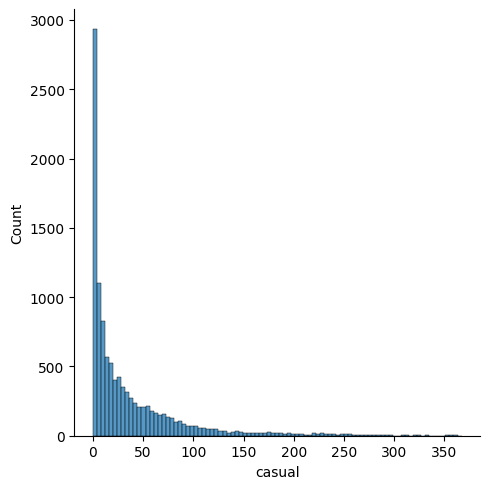

In [ ]:
sns.displot(df['casual'])

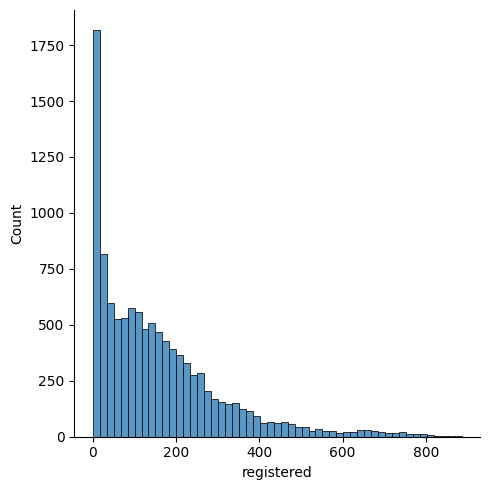

In [ ]:
sns.displot(df['registered'])

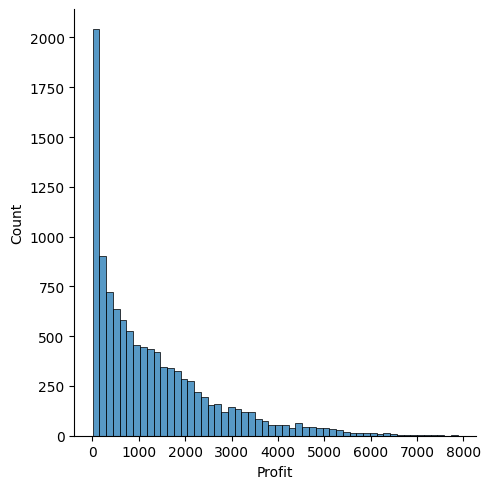

In [ ]:
sns.displot(df['Profit'])

**Numerical feature- Bivariante**

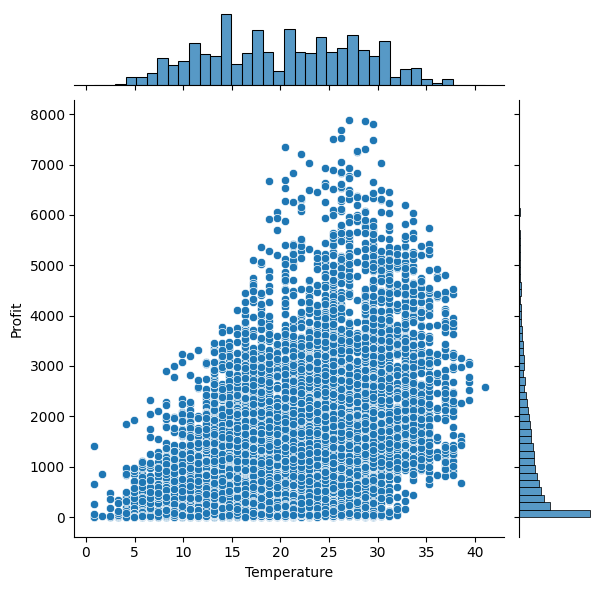

In [ ]:
sns.jointplot(x='Temperature', y='Profit', data=df)

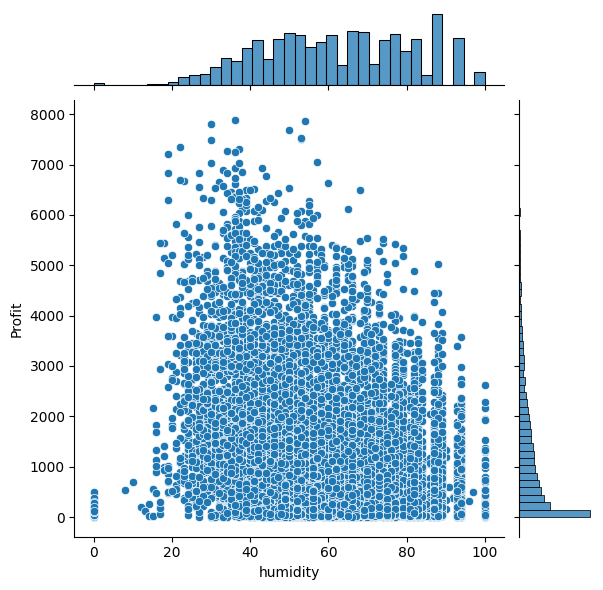

In [ ]:
#Negative correlation
sns.jointplot(x='humidity', y='Profit', data=df)

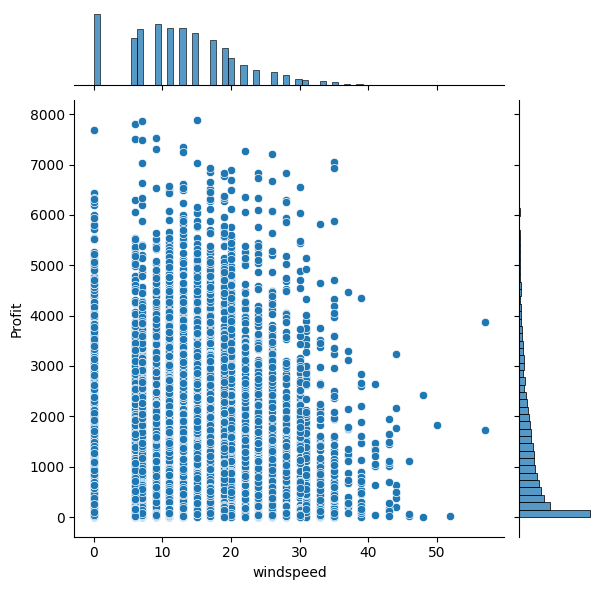

In [ ]:
#Negative correlation
sns.jointplot(x='windspeed', y='Profit', data=df)

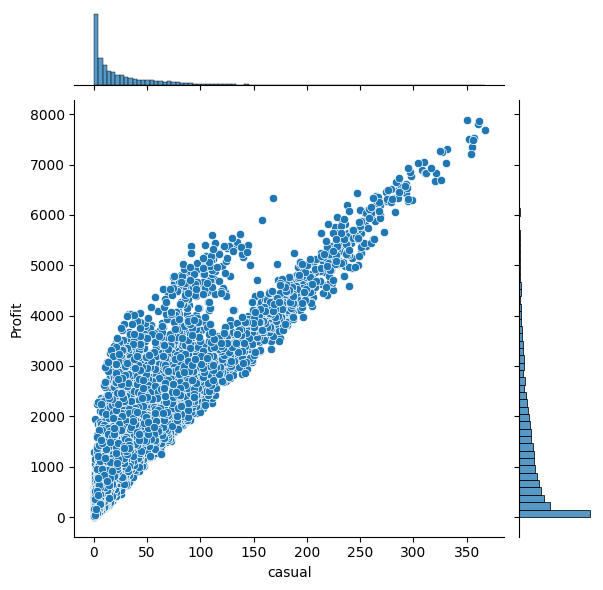

In [ ]:
#Positive correlation
sns.jointplot(x='casual', y='Profit', data=df)

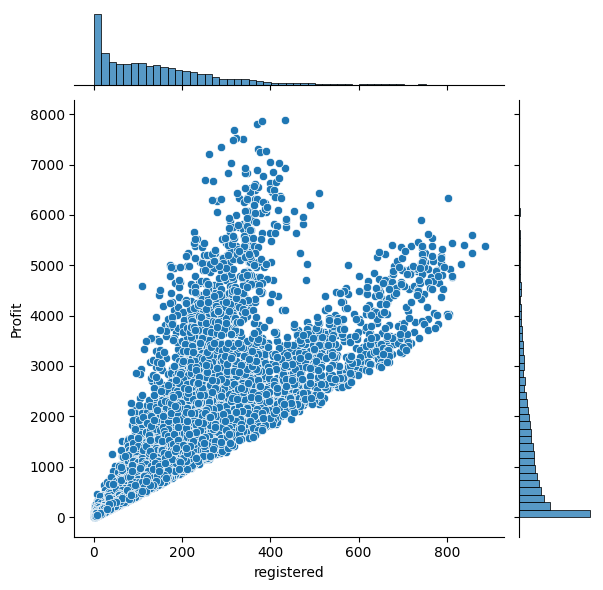

In [ ]:
#Positive correlation
sns.jointplot(x='registered', y='Profit', data=df)

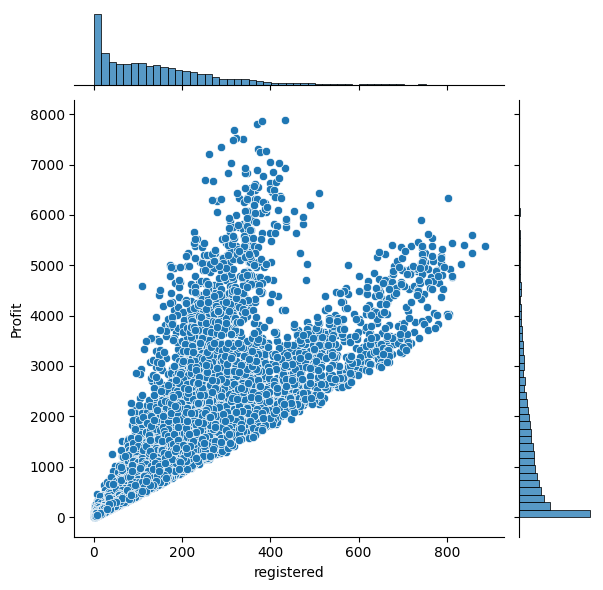

In [ ]:
#Positive correlation
sns.jointplot(x='registered', y='Profit', data=df)

**Catecorical-Feature**

<Axes: xlabel='Seasons', ylabel='count'>

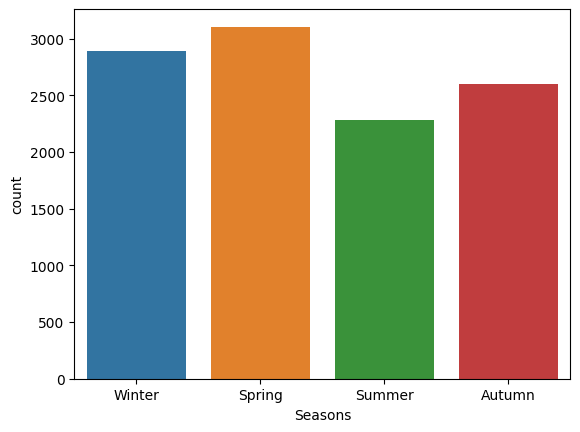

In [ ]:
sns.countplot(x='Seasons', data=df)

<Axes: xlabel='weather', ylabel='count'>

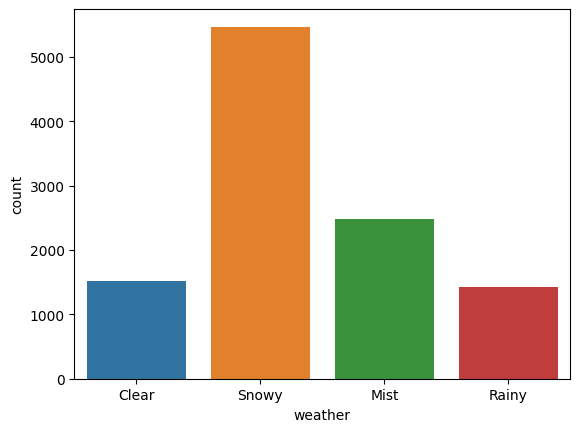

In [ ]:
sns.countplot(x='weather', data=df)

<Axes: xlabel='workingday', ylabel='count'>

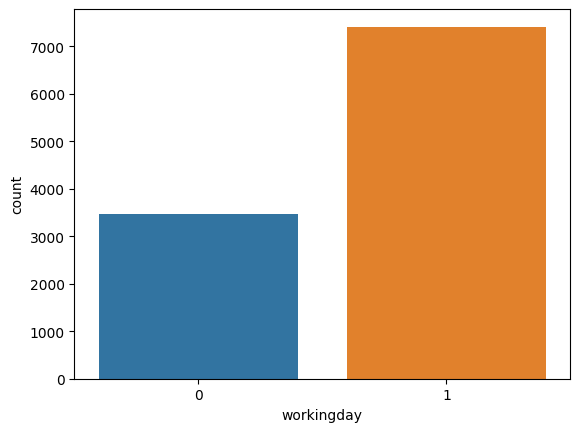

In [ ]:
sns.countplot(x='workingday', data=df)

<Axes: xlabel='year', ylabel='count'>

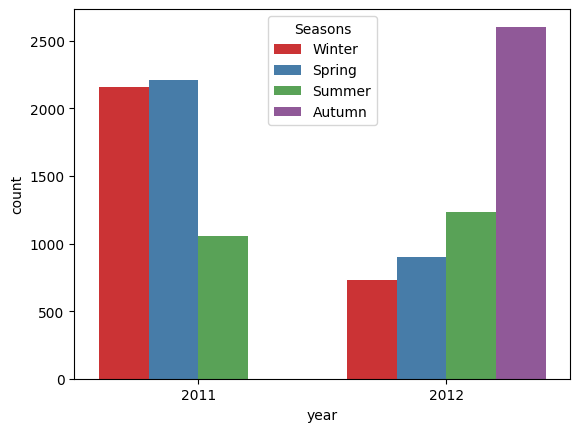

In [ ]:
sns.countplot(x='year', data=df,hue='Seasons',palette = "Set1")

<Axes: xlabel='day_of_week', ylabel='count'>

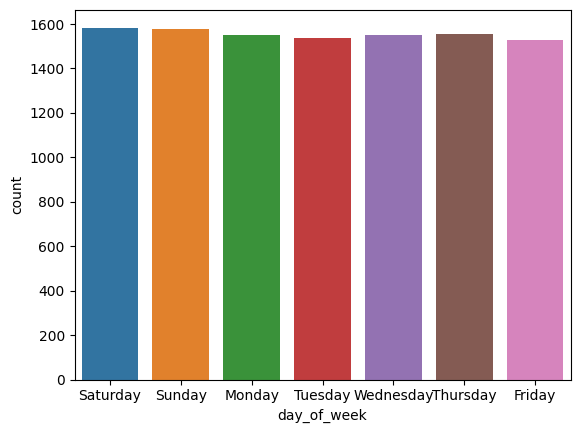

In [ ]:
sns.countplot(x='day_of_week', data=df)

<Axes: xlabel='hour', ylabel='count'>

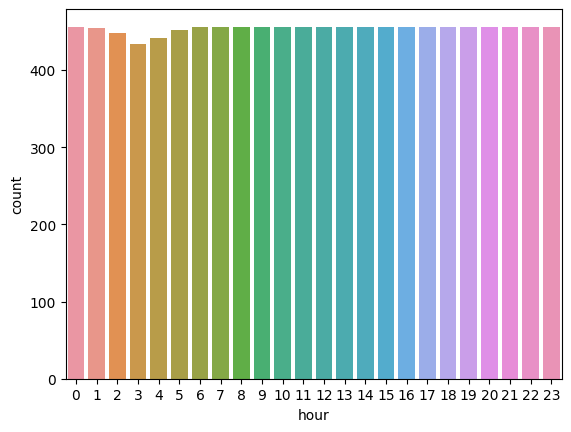

In [ ]:
sns.countplot(x='hour', data=df)

<Axes: xlabel='is_Rush_hour', ylabel='count'>

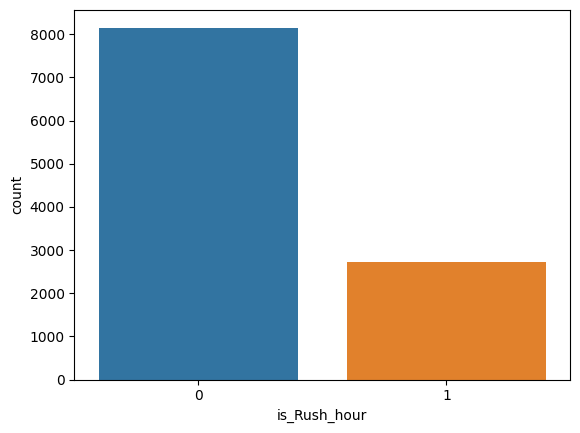

In [ ]:
sns.countplot(x='is_Rush_hour', data=df)

**Categorical Feature- Bivariant**

<Axes: xlabel='Seasons', ylabel='Profit'>

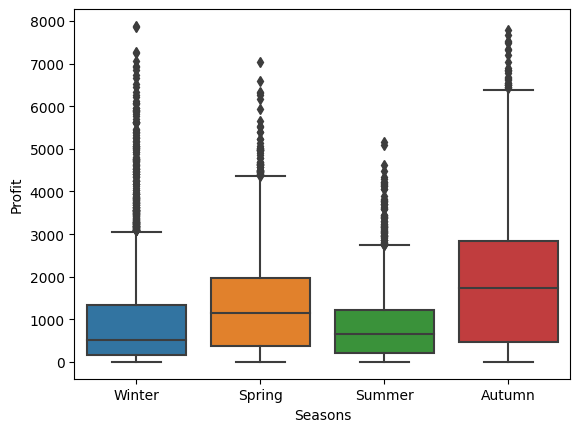

In [ ]:
sns.boxplot(x='Seasons', y='Profit', data=df)

<Axes: xlabel='workingday', ylabel='Profit'>

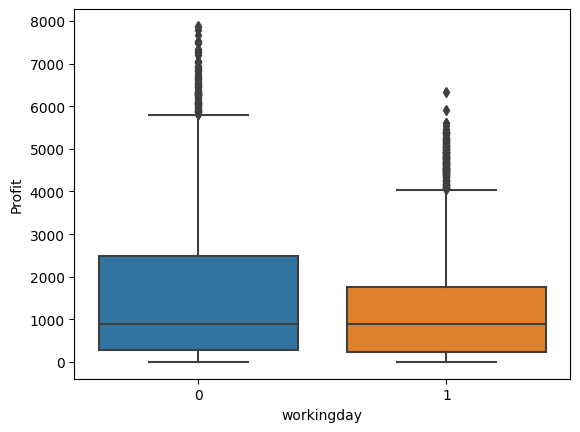

In [ ]:
sns.boxplot(x='workingday', y='Profit', data=df)

<Axes: xlabel='weather', ylabel='Profit'>

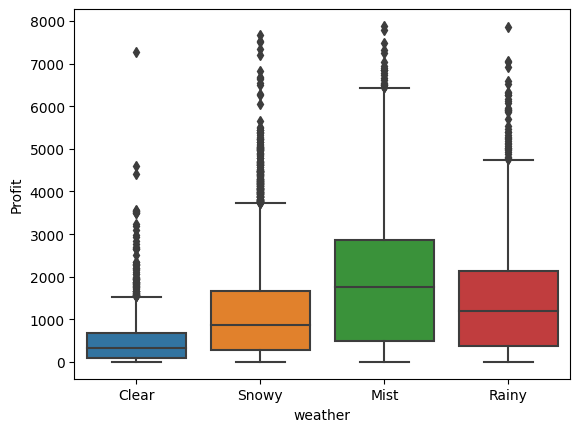

In [ ]:
sns.boxplot(x='weather', y='Profit', data=df)

<Axes: xlabel='hour', ylabel='Profit'>

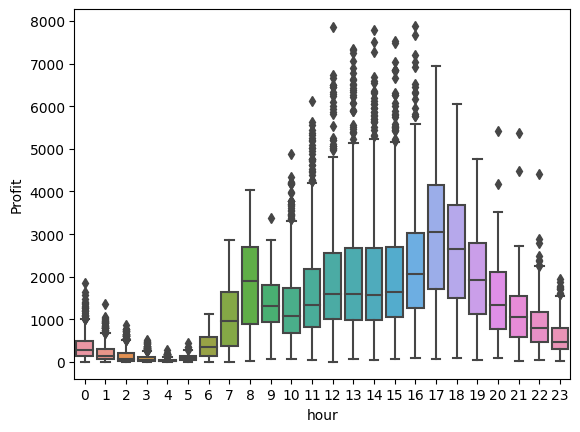

In [ ]:
sns.boxplot(x='hour', y='Profit', data=df)

<Axes: xlabel='is_Rush_hour', ylabel='Profit'>

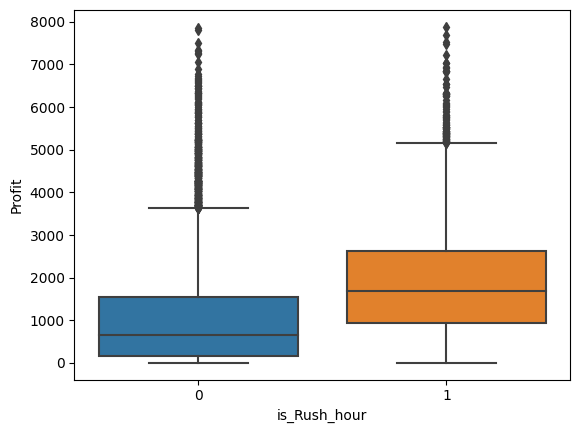

In [ ]:
sns.boxplot(x='is_Rush_hour', y='Profit', data=df)

<Axes: xlabel='day_of_week', ylabel='Profit'>

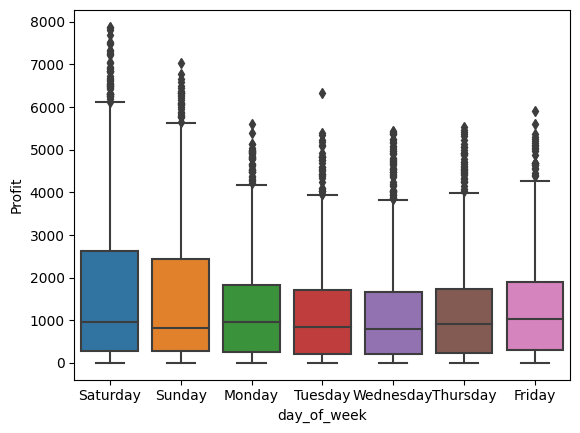

In [ ]:
sns.boxplot(x='day_of_week', y='Profit', data=df)

**Data** **Preprocessing**




1.   Data Cleaning

1.   Working with Missing Data

1.   Work with Categorical Data

1.   Detect and Handle Outliers

1.   Split Data to train and Test Sets
2.   Feature Scaling









In [ ]:
# Data Cleaning
df.describe()

,workingday,Temperature,humidity,windspeed,casual,registered,count,Profit,hour,month,year,is_Rush_hour
count,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.680875,20.23086,61.886460,12.799395,36.021955,155.552177,191.574132,1288.280751,11.541613,6.521495,2011.501929,0.251056
std,0.466159,7.79159,19.245033,8.164537,49.960477,151.039033,181.144454,1309.683400,6.915838,3.444373,0.500019,0.433641
min,0.000000,0.82000,0.000000,0.000000,0.000000,0.000000,1.000000,4.128767,0.000000,1.000000,2011.000000,0.000000
25%,0.000000,13.94000,47.000000,7.001500,4.000000,36.000000,42.000000,253.528767,6.000000,4.000000,2011.000000,0.000000
50%,1.000000,20.50000,62.000000,12.998000,17.000000,118.000000,145.000000,889.928767,12.000000,7.000000,2012.000000,0.000000
75%,1.000000,26.24000,77.000000,16.997900,49.000000,222.000000,284.000000,1891.828767,18.000000,10.000000,2012.000000,1.000000
max,1.000000,41.00000,100.000000,56.996900,367.000000,886.000000,977.000000,7881.728767,23.000000,12.000000,2012.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   Seasons       10886 non-null  object        
 2   workingday    10886 non-null  int64         
 3   weather       10886 non-null  object        
 4   Temperature   10886 non-null  float64       
 5   humidity      10886 non-null  int64         
 6   windspeed     10886 non-null  float64       
 7   casual        10886 non-null  int64         
 8   registered    10886 non-null  int64         
 9   count         10886 non-null  int64         
 10  Profit        10886 non-null  float64       
 11  hour          10886 non-null  int64         
 12  day_of_week   10886 non-null  object        
 13  month_name    10886 non-null  object        
 14  month         10886 non-null  int64         
 15  year          10886 non-null  int64 

#**Check if the data types int64 or float64 are numerical.**





In [ ]:
#check data types int64, float64 are Numerical
for col in ['Temperature', 'humidity', 'windspeed', 'casual', 'registered','count','Profit']:
  df[col]=pd.to_numeric(df[col],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   Seasons       10886 non-null  object        
 2   workingday    10886 non-null  int64         
 3   weather       10886 non-null  object        
 4   Temperature   10886 non-null  float64       
 5   humidity      10886 non-null  int64         
 6   windspeed     10886 non-null  float64       
 7   casual        10886 non-null  int64         
 8   registered    10886 non-null  int64         
 9   count         10886 non-null  int64         
 10  Profit        10886 non-null  float64       
 11  hour          10886 non-null  int64         
 12  day_of_week   10886 non-null  object        
 13  month_name    10886 non-null  object        
 14  month         10886 non-null  int64         
 15  year          10886 non-null  int64 

**Working with Missing Data**

In [ ]:
df.isnull().sum()

datetime        0
Seasons         0
workingday      0
weather         0
Temperature     0
humidity        0
windspeed       0
casual          0
registered      0
count           0
Profit          0
hour            0
day_of_week     0
month_name      0
month           0
year            0
is_Rush_hour    0
dtype: int64

#Work with Categorical Data

In [ ]:
df=df[['Seasons','workingday','weather','Temperature','humidity','count','Profit','month','day_of_week','hour']]
df

,Seasons,workingday,weather,Temperature,humidity,count,Profit,month,day_of_week,hour
0,Winter,0,Clear,9.84,81,16,107.328767,1,Saturday,0
1,Winter,0,Clear,9.02,80,40,275.028767,1,Saturday,1
2,Winter,0,Clear,9.02,80,32,201.928767,1,Saturday,2
3,Winter,0,Clear,9.84,75,13,94.428767,1,Saturday,3
4,Winter,0,Clear,9.84,75,1,4.128767,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...
10881,Summer,1,Rainy,15.58,50,336,1534.928767,12,Wednesday,19
10882,Summer,1,Rainy,14.76,57,241,1165.128767,12,Wednesday,20
10883,Summer,1,Rainy,13.94,61,168,773.828767,12,Wednesday,21
10884,Summer,1,Rainy,13.94,61,129,709.328767,12,Wednesday,22


In [ ]:
df=pd.get_dummies(df,columns=['Seasons','weather','day_of_week'], drop_first=True)
df

,workingday,Temperature,humidity,count,Profit,month,hour,Seasons_Spring,Seasons_Summer,Seasons_Winter,weather_Mist,weather_Rainy,weather_Snowy,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,9.84,81,16,107.328767,1,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,9.02,80,40,275.028767,1,1,0,0,1,0,0,0,0,1,0,0,0,0
2,0,9.02,80,32,201.928767,1,2,0,0,1,0,0,0,0,1,0,0,0,0
3,0,9.84,75,13,94.428767,1,3,0,0,1,0,0,0,0,1,0,0,0,0
4,0,9.84,75,1,4.128767,1,4,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1,15.58,50,336,1534.928767,12,19,0,1,0,0,1,0,0,0,0,0,0,1
10882,1,14.76,57,241,1165.128767,12,20,0,1,0,0,1,0,0,0,0,0,0,1
10883,1,13.94,61,168,773.828767,12,21,0,1,0,0,1,0,0,0,0,0,0,1
10884,1,13.94,61,129,709.328767,12,22,0,1,0,0,1,0,0,0,0,0,0,1


#Detect and Handle Outliers

In [ ]:
# Detect and Handle Outliers only on numerical values
df.describe()[['Temperature',	'humidity','count',	'Profit']]

,Temperature,humidity,count,Profit
count,10886.00000,10886.000000,10886.000000,10886.000000
mean,20.23086,61.886460,191.574132,1288.280751
std,7.79159,19.245033,181.144454,1309.683400
min,0.82000,0.000000,1.000000,4.128767
25%,13.94000,47.000000,42.000000,253.528767
50%,20.50000,62.000000,145.000000,889.928767
75%,26.24000,77.000000,284.000000,1891.828767
max,41.00000,100.000000,977.000000,7881.728767


#Split Data to train and Test Sets

In [ ]:
# all columns except profit is x else is y
x=df.drop('Profit',axis=1)
y=df['Profit']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(8708, 18)

#Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
model= RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
# Y_prediction
y_pred=model.predict(x_test)
y_pred

array([2367.32276712,  785.65376712,  294.89476712, ..., 2518.03776712,
       1629.52876712, 1082.00976712])

In [ ]:
y_test

2037     2498.128767
797       859.828767
9884      287.928767
7785     4863.128767
10351    3022.728767
            ...     
5810      606.128767
10089    2575.528767
9443     2128.328767
4243     1874.628767
681      1139.328767
Name: Profit, Length: 2178, dtype: float64

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

165.1361738761279

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'model.h5')

['model.h5']

In [ ]:
joblib.dump(model,'scaler.h5')

['scaler.h5']